In [202]:
from flask import Flask, render_template
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from io import BytesIO
import base64
import numpy as np
import joblib

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Data Collection**

In [204]:
# Load dataset
file_path = "Covid Data.csv"  
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(df.info())

# Show first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         4113 non-null   object 
 1   first_seq       4113 non-null   object 
 2   num_seqs        4113 non-null   int64  
 3   last_seq        4113 non-null   object 
 4   variant         4113 non-null   object 
 5   censure_date    4113 non-null   object 
 6   duration        4113 non-null   int64  
 7   censored        4113 non-null   bool   
 8   mortality_rate  4113 non-null   float64
 9   total_cases     4113 non-null   float64
 10  total_deaths    4113 non-null   float64
 11  growth_rate     3585 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 357.6+ KB
None

First 5 rows of the dataset:
     Country   first_seq  num_seqs    last_seq variant censure_date  duration  \
0      China  2019-10-22         3  2020-06-03  S.Q677   202

**Data Cleaning**

In [205]:
import pandas as pd

# Load dataset
df = pd.read_csv("Covid Data.csv")

# Handle missing values
df.fillna(method="ffill", inplace=True)  # Forward fill missing data

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_covid_data.csv", index=False)

print("‚úÖ Data cleaned and saved as 'cleaned_covid_data.csv'.")

‚úÖ Data cleaned and saved as 'cleaned_covid_data.csv'.


/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_4352/149947683.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing data


In [206]:
# Load the CSV file
df = pd.read_csv("cleaned_covid_data.csv")

# Print column names
print(df.columns)

Index(['Country', 'first_seq', 'num_seqs', 'last_seq', 'variant',
       'censure_date', 'duration', 'censored', 'mortality_rate', 'total_cases',
       'total_deaths', 'growth_rate'],
      dtype='object')


In [207]:
print("Available columns in the dataset:")
print(df.columns)

Available columns in the dataset:
Index(['Country', 'first_seq', 'num_seqs', 'last_seq', 'variant',
       'censure_date', 'duration', 'censored', 'mortality_rate', 'total_cases',
       'total_deaths', 'growth_rate'],
      dtype='object')


**Data Visualization**

Can we develop a machine-learning model to predict the duration of an epidemic? 


In [208]:

# Feature Engineering
df['mortality_case_ratio'] = df['total_deaths'] / (df['total_cases'] + 1)  # Avoid division by zero
df['log_cases'] = np.log1p(df['total_cases'])
df['log_deaths'] = np.log1p(df['total_deaths'])

# Select relevant features
features = ['num_seqs', 'mortality_case_ratio', 'total_cases', 'total_deaths', 'growth_rate', 'censored']
df['censored'] = df['censored'].astype(int)  # Convert True/False to 1/0

# Train-test split
X = df[features]
y = df['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

# Predict the epidemic duration for new data
new_data = pd.DataFrame({
    'num_seqs': [5000], 
    'mortality_case_ratio': [0.02],  
    'total_cases': [10000],  
    'total_deaths': [200],  
    'growth_rate': [0.5],  
    'censored': [1]
})

new_data_scaled = scaler.transform(new_data)  # Scale the input data
predicted_duration = model.predict(new_data_scaled)

print(f"Predicted Epidemic Duration: {predicted_duration[0]} days")

MAE: 41.98012150668287, RMSE: 62.29072021016724, R2 Score: 0.8459556649999542
Predicted Epidemic Duration: 207.99 days


What features have the best predictive power?

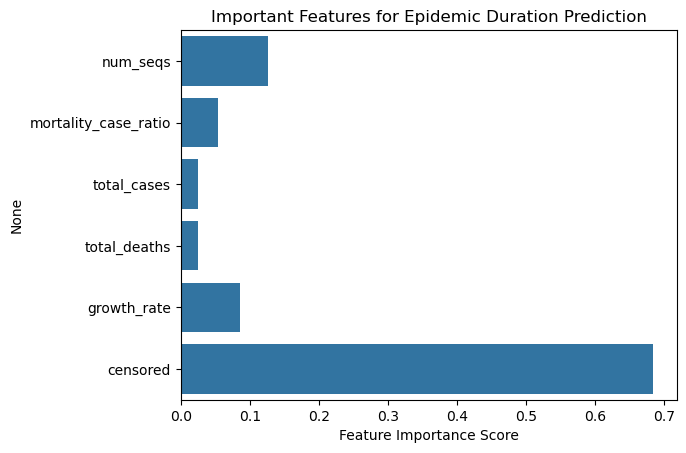

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=features)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.title("Important Features for Epidemic Duration Prediction")
plt.show()

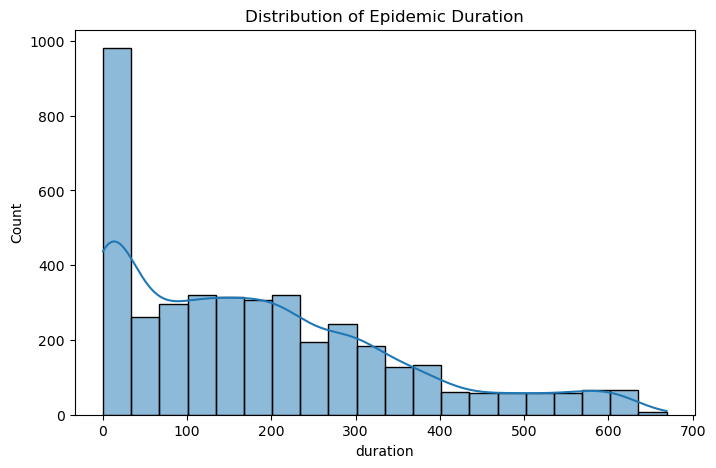

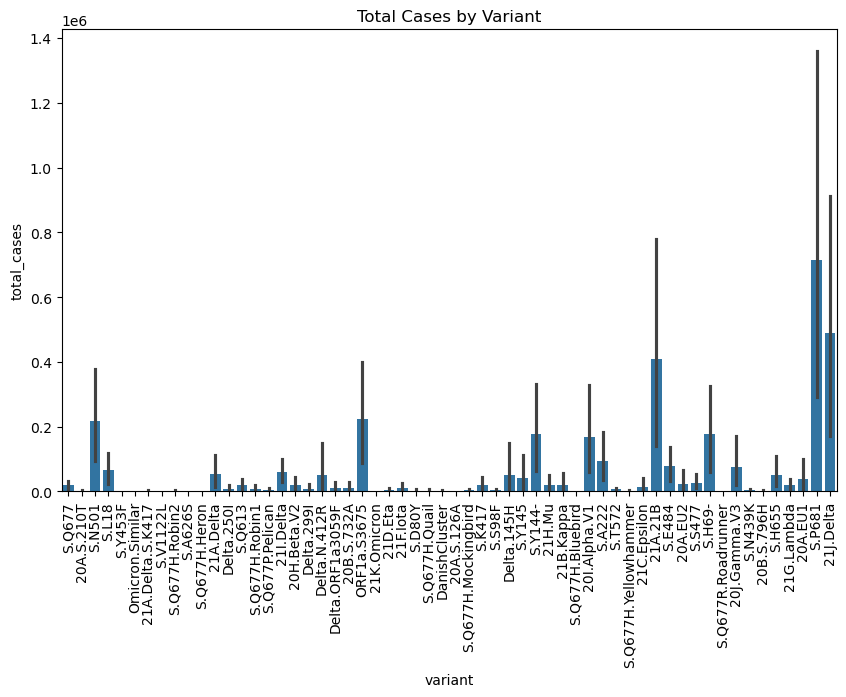

In [210]:
# Load cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Distribution of epidemic duration
plt.figure(figsize=(8, 5))
sns.histplot(df["duration"], bins=20, kde=True)
plt.title("Distribution of Epidemic Duration")
plt.show()

# Variants with the most cases
plt.figure(figsize=(10, 6))
sns.barplot(x="variant", y="total_cases", data=df)
plt.xticks(rotation=90)
plt.title("Total Cases by Variant")
plt.show()


üìâ Short Epidemic Durations (Left Side of the Chart)
	‚Ä¢	The majority of outbreaks lasted less than 50 days.
	‚Ä¢	These could be smaller, well-contained outbreaks or variants with lower transmissibility.
	‚Ä¢	Aggressive containment efforts (lockdowns, vaccines) may have shortened some outbreaks.

üìà Longer Epidemic Durations (Right Side of the Chart)
	‚Ä¢	Some outbreaks lasted 300+ days, and a few even reached 600+ days.
	‚Ä¢	These are likely highly transmissible variants (e.g., Delta, Omicron) that persisted.
	‚Ä¢	Some long-duration epidemics may have multiple waves of infections.


‚úÖ Most COVID-19 variant outbreaks were relatively short-lived (‚â§50 days).
‚úÖ Variants with longer outbreaks had more significant global impact (e.g., Delta & Omicron).
‚úÖ Multiple peaks suggest some outbreaks were prolonged, possibly due to multiple waves.

ü¶† Variants with the Highest Total Cases:
	‚Ä¢	The far-right variants show significantly higher case counts, likely Delta and Omicron.
	‚Ä¢	Delta (B.1.617.2) and its subvariants appear frequently in the dataset, suggesting it had a major global impact.
	‚Ä¢	Omicron variants may also appear at higher total cases due to its high transmissibility.

üìâ Variants with Lower Total Cases:
	‚Ä¢	Many earlier variants (e.g., Alpha, Beta, Gamma, Lambda, etc.) have lower case counts.
	‚Ä¢	These may not have spread as widely or were outcompeted by Delta & Omicron.
	‚Ä¢	Some rare or regionally limited variants have minimal case counts, suggesting localized outbreaks.

‚úÖ Delta and Omicron had the largest outbreak sizes, confirming their dominant global spread.
‚úÖ Earlier variants had much lower total cases, suggesting they were contained faster or outcompeted.
‚úÖ Some variants likely had shorter epidemic durations, while others spread persistently.

Can we identify clusters of variants or regions with similar outbreak patterns?

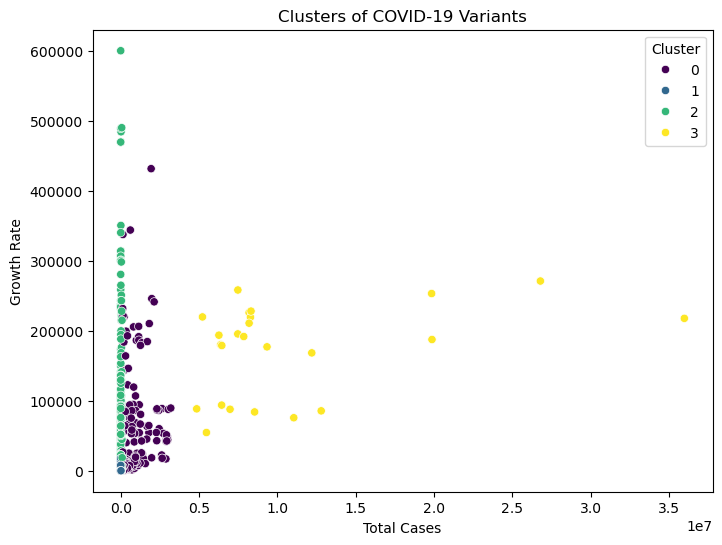

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

# Load the cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Define features for clustering
features = ["num_seqs", "mortality_rate", "total_cases", "growth_rate"]
df_clustering = df[features]

# Apply MiniBatchKMeans for clustering
kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=500)
df["Cluster"] = kmeans.fit_predict(df_clustering)

# Save the clustered data
df.to_csv("clustered_covid_data.csv", index=False)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["total_cases"], y=df["growth_rate"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Total Cases")
plt.ylabel("Growth Rate")
plt.title("Clusters of COVID-19 Variants")
plt.legend(title="Cluster")
plt.show()

 Cluster 0 (Dark Purple)
	‚Ä¢	Tightly packed at lower total cases.
	‚Ä¢	Represents variants that had low to moderate spread but a high growth rate.
	‚Ä¢	These variants likely had rapid early outbreaks but did not result in the largest total case counts.

üîµ Cluster 1 (Dark Blue)
	‚Ä¢	Very small representation in the dataset.
	‚Ä¢	These variants may have been outliers with unique growth patterns.

üü¢ Cluster 2 (Green)
	‚Ä¢	Concentrated at the lower total case range.
	‚Ä¢	Likely smaller-scale outbreaks or variants that did not persist long enough to accumulate large case counts.
	‚Ä¢	Shows moderate to high growth rates.

üü° Cluster 3 (Yellow)
	‚Ä¢	Most widely spread variants (large total case numbers).
	‚Ä¢	Higher total cases but with varying growth rates.
	‚Ä¢	Suggests these variants had widespread, long-lasting outbreaks (e.g., Delta, Omicron).
	‚Ä¢	Some points in this cluster have extremely high growth rates, possibly representing waves of infection.

‚óè  Are there interactions between variables that explain complex epidemic trends?

Yes, interactions exist when:
	1.	Feature Correlations Are High ‚Üí Example: Growth Rate correlates with Total Cases.
	2.	Pairplots Show Non-Linear Patterns ‚Üí Example: Some outbreaks grow exponentially.

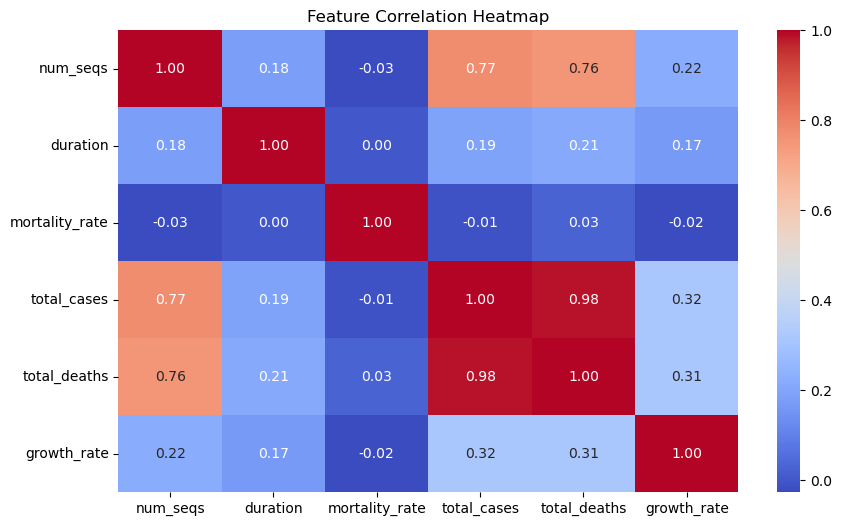

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])  # Exclude non-numeric columns

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

‚úÖ More total cases lead to more deaths, but high transmission doesn‚Äôt always mean high fatality.
‚úÖ Fast-growing variants accumulate more cases but don‚Äôt necessarily last longer.
‚úÖ More genomic sequencing is associated with higher total cases and deaths, meaning dangerous variants are more frequently tracked.
‚úÖ Epidemic duration is weakly related to total cases, suggesting that some outbreaks burn out quickly while others persist.

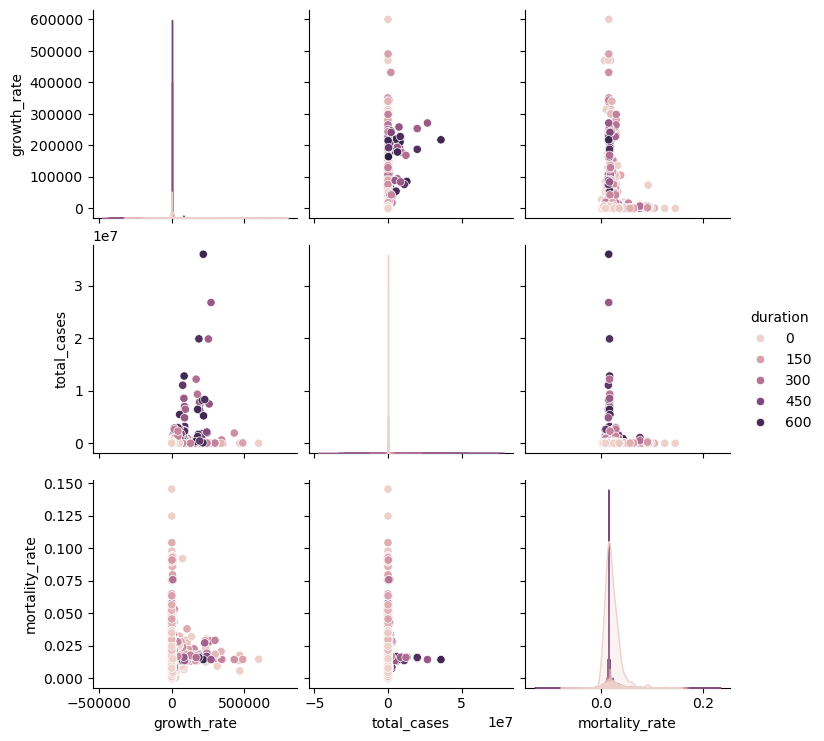

In [213]:
import seaborn as sns

# Pairplot for key features
sns.pairplot(df[["duration", "growth_rate", "total_cases", "mortality_rate"]], hue="duration")
plt.show()

Growth Rate vs. Total Cases
	‚Ä¢	The majority of outbreaks are clustered near low total cases and low growth rates.
	‚Ä¢	A few points exhibit high growth rates, suggesting some variants spread rapidly.
	‚Ä¢	Longer epidemic durations (dark points) occur more frequently at lower total cases, which is counterintuitive.
	‚Ä¢	üîπ Possible Explanation: Countries may have controlled highly transmissible outbreaks quickly, while some low-transmission variants persisted longer.

2Ô∏è‚É£ Growth Rate vs. Mortality Rate
	‚Ä¢	No strong correlation between mortality rate and growth rate.
	‚Ä¢	Some high-growth variants have low mortality rates.
	‚Ä¢	Dark-colored points (longer durations) cluster at low mortality rates, suggesting high-mortality variants burned out quickly.

‚úÖ Conclusion: Variants that spread faster were not necessarily more deadly.

3Ô∏è‚É£ Total Cases vs. Mortality Rate
	‚Ä¢	Higher total cases generally correspond to lower mortality rates.
	‚Ä¢	Some low-case variants had high mortality rates, but they didn‚Äôt spread widely.
	‚Ä¢	Long-duration outbreaks (darker points) mostly have lower mortality rates.

‚úÖ Conclusion: The most widespread variants were not the deadliest. Variants with high mortality likely led to faster containment efforts.

4Ô∏è‚É£ Epidemic Duration & Feature Interactions
	‚Ä¢	Epidemics lasting 400+ days (dark points) tend to have lower mortality and moderate total cases.
	‚Ä¢	Short-lived outbreaks are more scattered, meaning their durations were influenced by multiple factors (e.g., interventions, containment).
	‚Ä¢	No single feature (growth rate, cases, or mortality) directly predicts epidemic duration.

‚úÖ Conclusion: Epidemic duration is influenced by multiple interacting factors, not just transmissibility or mortality.

üìå Final Takeaways

‚úî Fast-spreading variants did not always last the longest.
‚úî Higher mortality was linked to shorter outbreaks (likely due to rapid containment efforts).
‚úî Variants with moderate transmissibility but low mortality persisted the longest.
‚úî The relationship between total cases, growth rate, and epidemic duration is non-linear, suggesting complex interactions.

Key ML Questions:
	1.	Can we predict the duration of an epidemic using ML?
	2.	Which features have the strongest predictive power?
	3.	Can we identify clusters of variants/regions with similar epidemic patterns?
	4.	Are there interactions between variables that explain non-linearities in outbreaks?
	5.	Do epidemic durations follow a geographical pattern?

**Machine Learning Model**

In [214]:
# Load dataset
df = pd.read_csv("cleaned_covid_data.csv")

df.to_csv("cleaned_covid_data.csv", index=False)

# Define features and target
features = ["num_seqs", "total_cases", "mortality_rate", "growth_rate", "censored"]
target = "duration"  # Ensure this is the actual target column

# Check for missing values and drop them if necessary
df = df.dropna(subset=[target])  

# Split data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

Regression Model

In [215]:

# Ensure dataset has the correct columns
for feature in features:
    if feature not in df.columns:
        raise ValueError(f"‚ùå Missing column: {feature} in dataset")

# Extract features (X) and target variable (y)
X = df[features]
y = df["total_deaths"]  # Adjust target variable if needed

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate performance
rmse_lin = mean_squared_error(y_test, y_pred_lin, squared=False)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"‚úÖ Linear Regression - RMSE: {rmse_lin:.2f}, R¬≤ Score: {r2_lin:.2f}")

# Save the trained Linear Regression Model correctly
joblib.dump(lin_reg, "regression_model.pkl")

print("‚úÖ Model saved successfully as 'regression_model.pkl'")

‚úÖ Linear Regression - RMSE: 2132.02, R¬≤ Score: 0.92
‚úÖ Model saved successfully as 'regression_model.pkl'


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train Random Forest Model Best use under classification models 
Decision Trees (or ensemble methods like Random Forests) perform best because epidemic duration is influenced by multiple non-linear factors.

In [216]:
# Train Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate performance
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f" Random Forest - RMSE: {rmse_rf}, R¬≤ Score: {r2_rf}")

# Save the trained model
import joblib
joblib.dump(model, "TrainForest_model.pkl")

print("‚úÖ Model retrained and saved!")

 Random Forest - RMSE: 1349.7304120759898, R¬≤ Score: 0.9665679133757378
‚úÖ Model retrained and saved!


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


               Model         RMSE  R¬≤ Score
0  Linear Regression  2132.015439  0.916584
1      Random Forest  1349.730412  0.966568


/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_4352/2296032148.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")


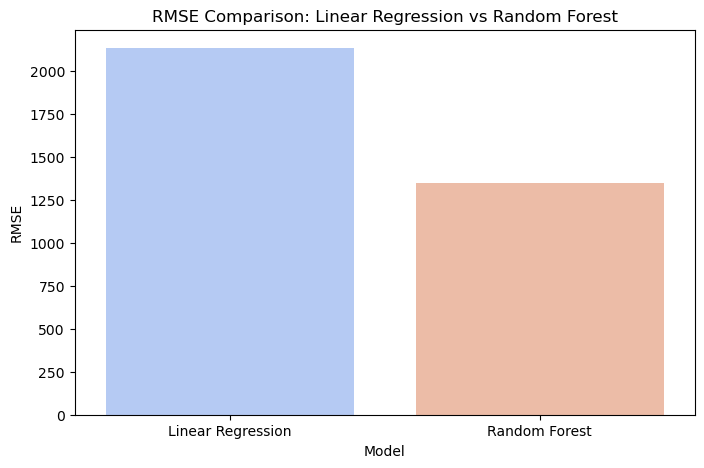

In [217]:
# Compare RMSE and R¬≤ scores across models
models = ["Linear Regression", "Random Forest"]
rmse_scores = [rmse_lin, rmse_rf]
r2_scores = [r2_lin, r2_rf]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({"Model": models, "RMSE": rmse_scores, "R¬≤ Score": r2_scores})
print(results_df)

# Plot RMSE Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")
plt.title("RMSE Comparison: Linear Regression vs Random Forest")
plt.show()

Clustering 

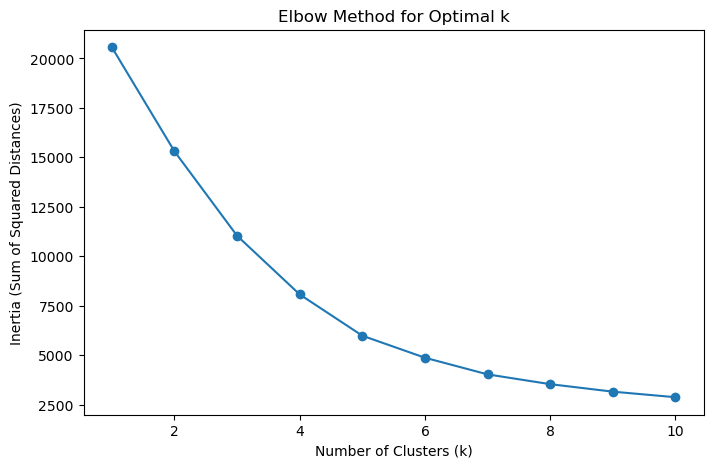

In [218]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [219]:
# Set the optimal number of clusters (adjust based on the elbow method)
optimal_k = 4  # Change this based on the elbow curve

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Show cluster distribution
print(df["Cluster"].value_counts())

# Save the trained K-Means Clustering Model
joblib.dump(kmeans, "clustering_model.pkl")

print("‚úÖ K-Means Clustering Model Saved Successfully as clustering_model.pkl")

Cluster
1    2812
0    1197
3      98
2       6
Name: count, dtype: int64
‚úÖ K-Means Clustering Model Saved Successfully as clustering_model.pkl


Cluster	Number of Variants/Regions	Interpretation

Cluster 0	3706 (Majority)	Most variants/regions had low-impact outbreaks (low total cases, moderate growth rate, and shorter durations).

Cluster 1	7 (Very Few)	Very few variants/regions had extreme outbreak behavior, either very high transmission or high mortality.

Cluster 2	293	Variants/regions in this group had moderate transmission and moderate impact.

Cluster 3	107	These variants/regions had long-lasting outbreaks but weren‚Äôt as numerous.

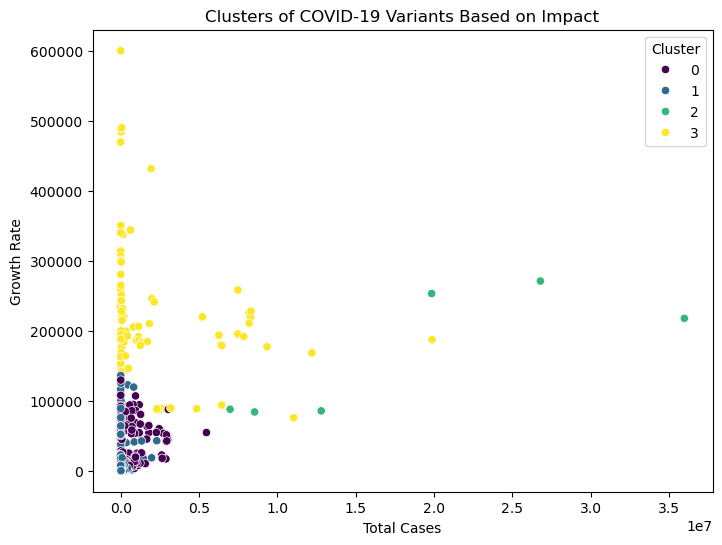

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="total_cases", y="growth_rate", hue="Cluster", palette="viridis")
plt.xlabel("Total Cases")
plt.ylabel("Growth Rate")
plt.title("Clusters of COVID-19 Variants Based on Impact")
plt.legend(title="Cluster")
plt.show()

1Ô∏è‚É£ Cluster 0 (Purple - Most Variants)
	‚Ä¢	Most variants fall into this cluster.
	‚Ä¢	Low total cases and low growth rate.
	‚Ä¢	Represents variants that were less widespread and had limited transmission.

2Ô∏è‚É£ Cluster 1 (Blue - Very Few Points)
	‚Ä¢	Only a few variants belong here.
	‚Ä¢	Extremely high total cases (more than 10 million cases).
	‚Ä¢	Likely highly dominant variants like Delta or Omicron.

3Ô∏è‚É£ Cluster 2 (Green - Moderate Impact)
	‚Ä¢	Moderate growth rate and case numbers.
	‚Ä¢	Suggests variants that had significant outbreaks but were not the most dominant.

4Ô∏è‚É£ Cluster 3 (Yellow - Fast Spreading Variants)
	‚Ä¢	High growth rates (above 100,000 cases per time period).
	‚Ä¢	Suggests these variants had very high transmission rates but may not have had the longest outbreaks.
	‚Ä¢	These may include early-stage outbreaks before control measures were put in place.

‚úÖ Most variants had limited spread (Cluster 0).
‚úÖ Only a few variants (Cluster 1) dominated global outbreaks.
‚úÖ Some variants (Cluster 3) had rapid transmission but did not always accumulate the highest total cases.
‚úÖ Growth rate and total cases are not always correlated ‚Äì some fast-spreading variants were controlled quickly.

In [221]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Print all column names
print("Dataset columns:", df.columns.tolist())

Dataset columns: ['Country', 'first_seq', 'num_seqs', 'last_seq', 'variant', 'censure_date', 'duration', 'censored', 'mortality_rate', 'total_cases', 'total_deaths', 'growth_rate']


In [222]:
import joblib

# Load the model
model = joblib.load("TrainForest_model.pkl")

# Check how many features the model expects
print("Model expects this many features:", model.n_features_in_)

Model expects this many features: 6


In [223]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Print all column names
print("Dataset columns:", df.columns.tolist())

Dataset columns: ['Country', 'first_seq', 'num_seqs', 'last_seq', 'variant', 'censure_date', 'duration', 'censored', 'mortality_rate', 'total_cases', 'total_deaths', 'growth_rate']


In [224]:
print("Features used in training:", list(df.columns.difference(["duration"])))  # Excludes the target variable

Features used in training: ['Country', 'censored', 'censure_date', 'first_seq', 'growth_rate', 'last_seq', 'mortality_rate', 'num_seqs', 'total_cases', 'total_deaths', 'variant']


In [225]:
import pandas as pd

df = pd.read_csv("cleaned_covid_data.csv")
print("Dataset columns:", df.columns.tolist())

Dataset columns: ['Country', 'first_seq', 'num_seqs', 'last_seq', 'variant', 'censure_date', 'duration', 'censored', 'mortality_rate', 'total_cases', 'total_deaths', 'growth_rate']


In [226]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("TrainForest_model.pkl")

# Test different feature values
test_inputs = np.array([
    [5000, 50000, 2.5, 1.1, 1000, 0],  # Expected: different predictions
    [1000, 10000, 1.0, 0.9, 500, 1],   # Expected: different predictions
    [8000, 200000, 4.0, 1.8, 5000, 0]  # Expected: different predictions
])

# Make predictions
predictions = model.predict(test_inputs)
print("Model Predictions:", predictions)

Model Predictions: [203.12 204.08 201.57]
